In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv(r"I:\1 murali\great learning\Internship\Sparks foundation\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**1. Scince there is a city,state and region column so we can drop the postal code.**

**2. The country column has only one country we can also drop this column also.**

In [16]:
df = df.drop(["Postal Code","Country"],axis=1)

In [17]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Univariant - Numerical

In [37]:
print("\t\t\t Numerical Columns")
for i in df.select_dtypes(exclude="O").columns:
    print("",i)

			 Numerical Columns
 Sales
 Quantity
 Discount
 Profit


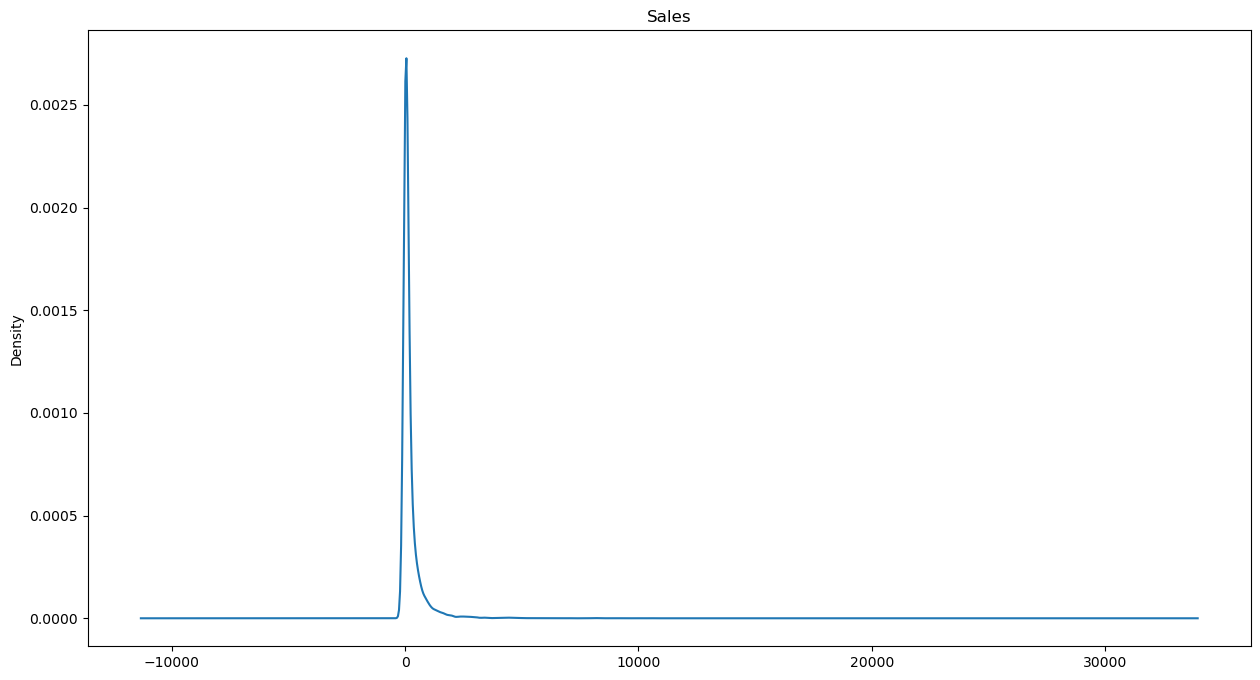

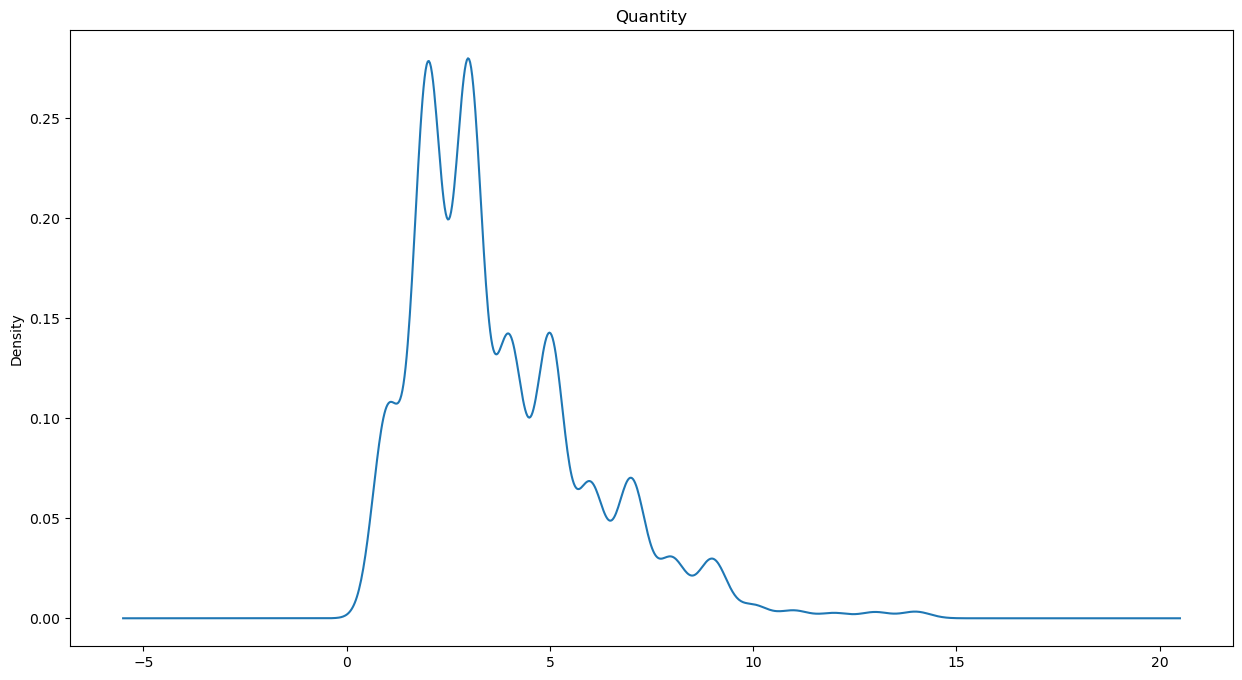

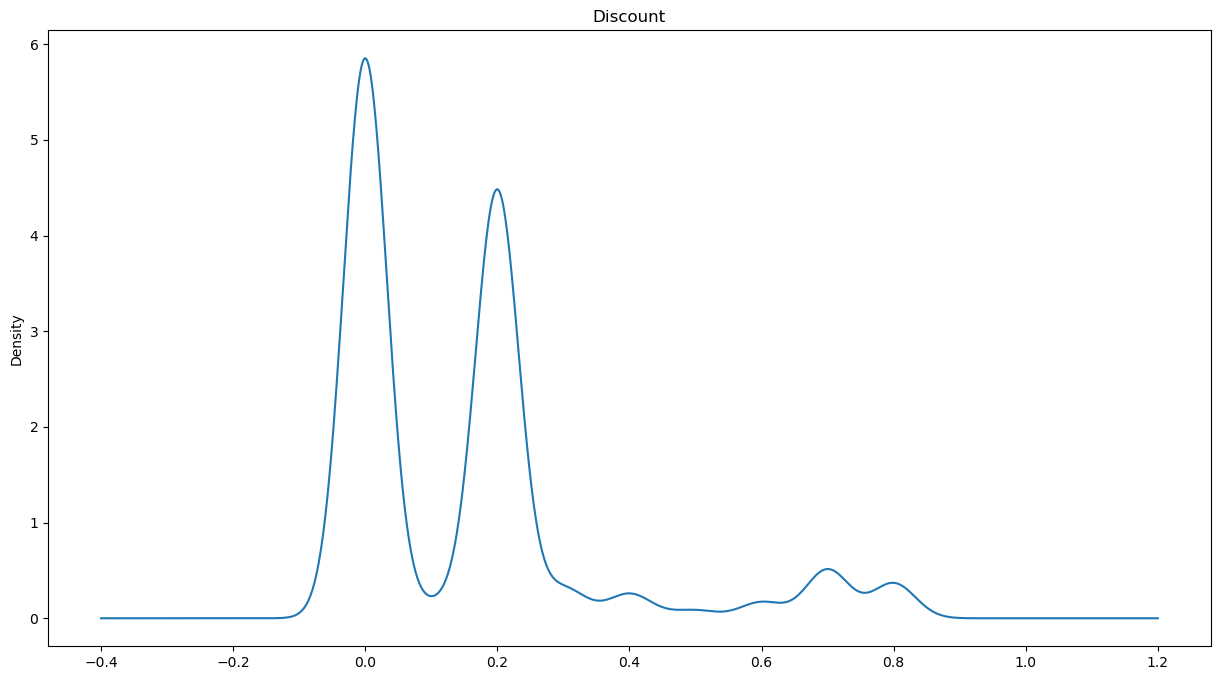

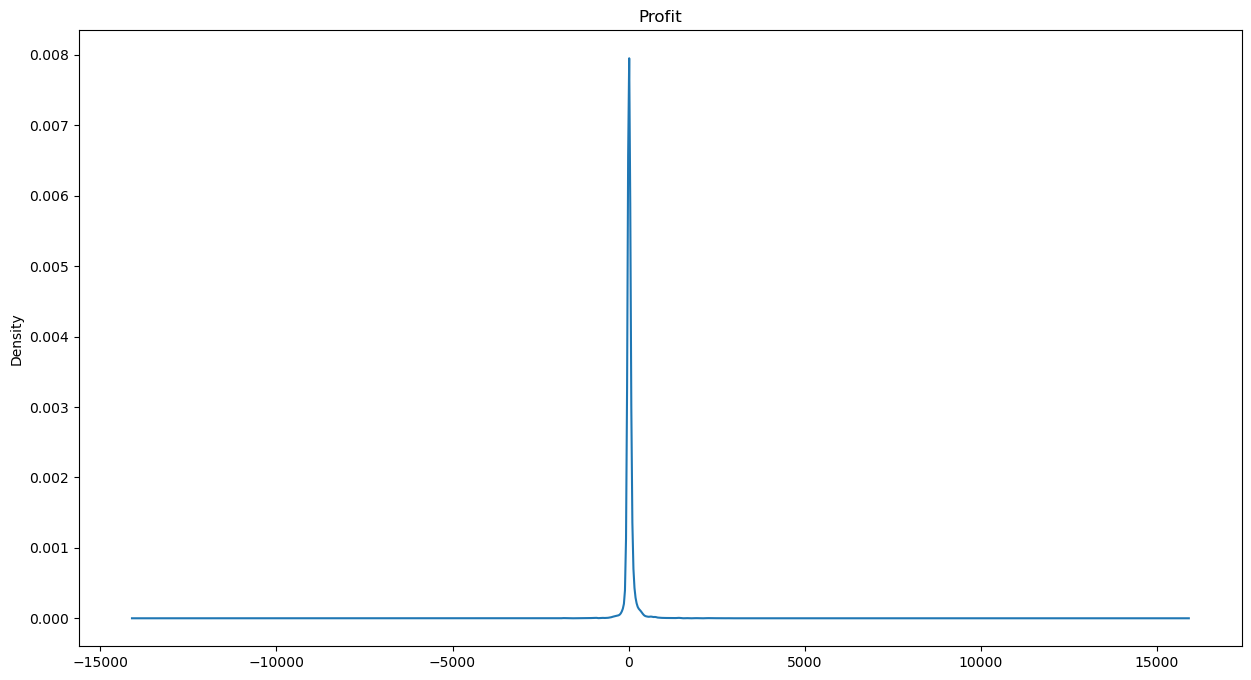

In [67]:
for i in df.select_dtypes(exclude="O").columns:
    plt.figure(figsize=(15,8))
    df[i].plot(kind="kde")
    plt.title(i)
    plt.show()

In [28]:
for i in df.select_dtypes(exclude="O").columns:
    print(i,":",df[i].skew())

Sales : 12.97275234181623
Quantity : 1.2785447527223421
Discount : 1.6842947474238648
Profit : 7.561431562468343


**All the numerical columns are positively skewed but the sales and profit columns are highly skewed.**

### Univariant - Categorical

In [38]:
print("\t\t\t Categorical Columns")
for i in df.select_dtypes(include="O").columns:
    print("",i)

			 Categorical Columns
 Ship Mode
 Segment
 City
 State
 Region
 Category
 Sub-Category


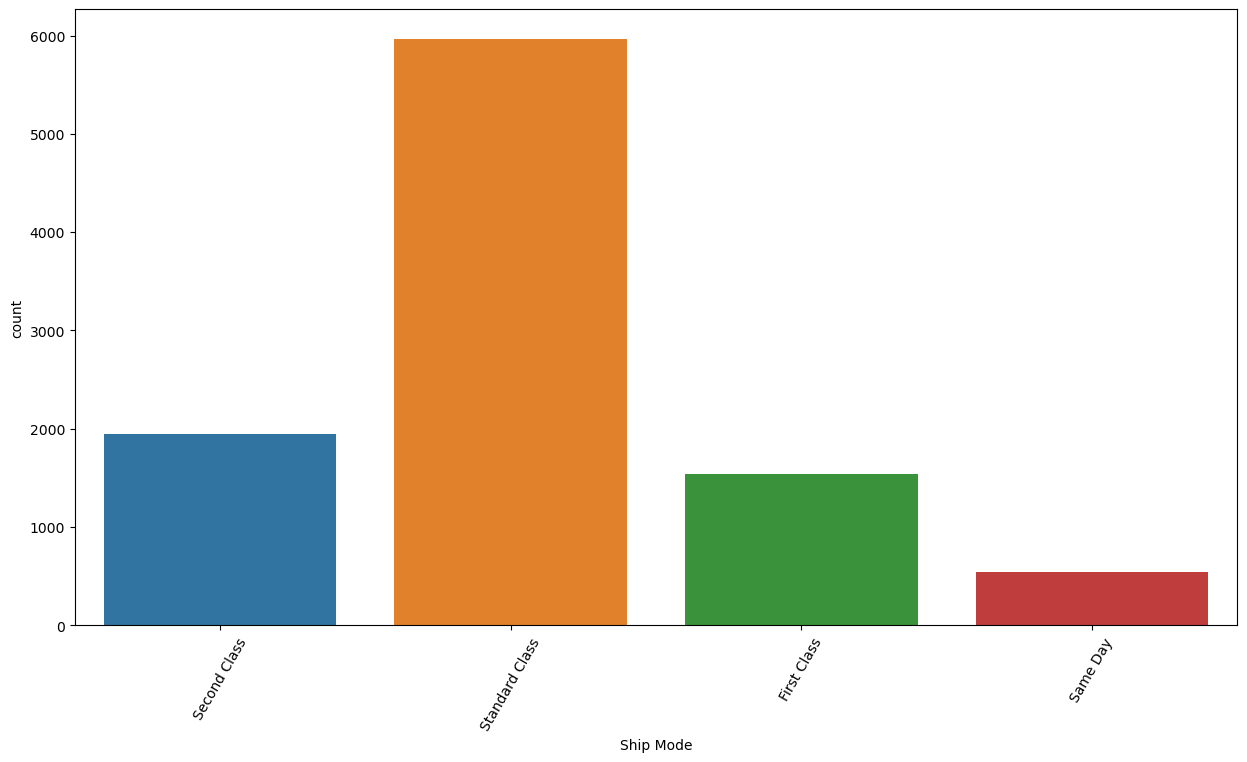

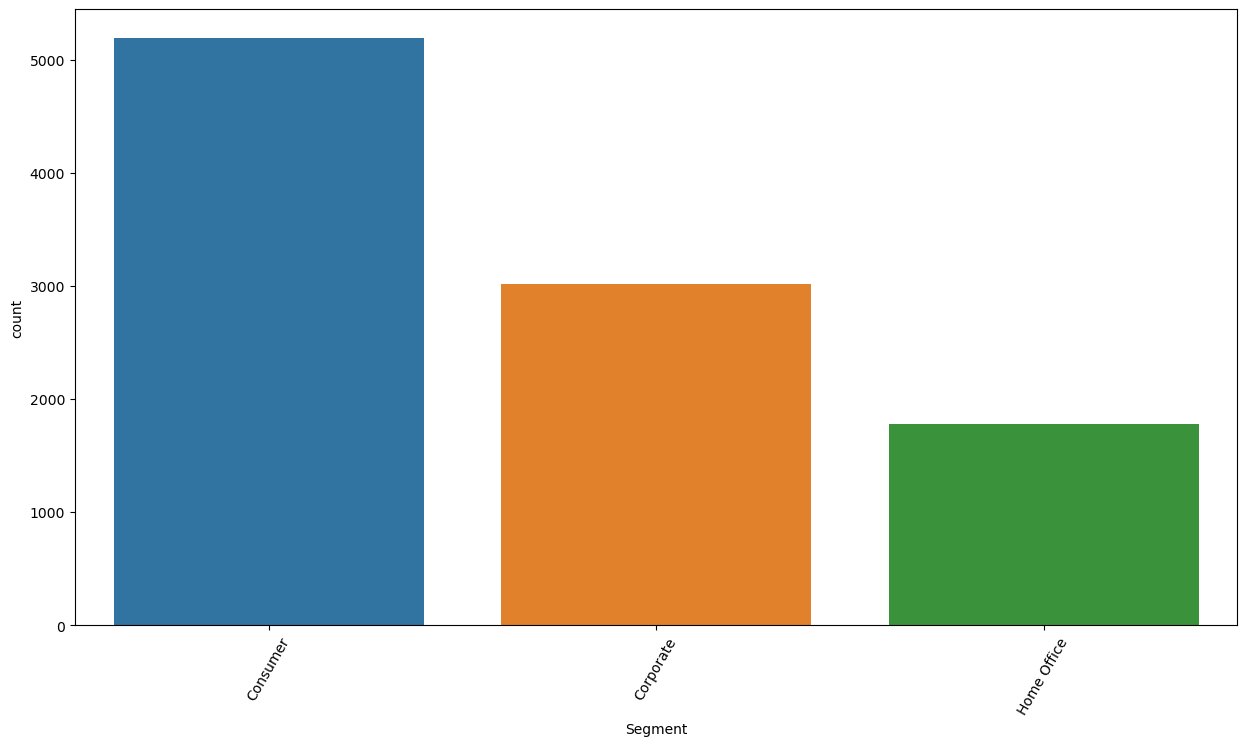

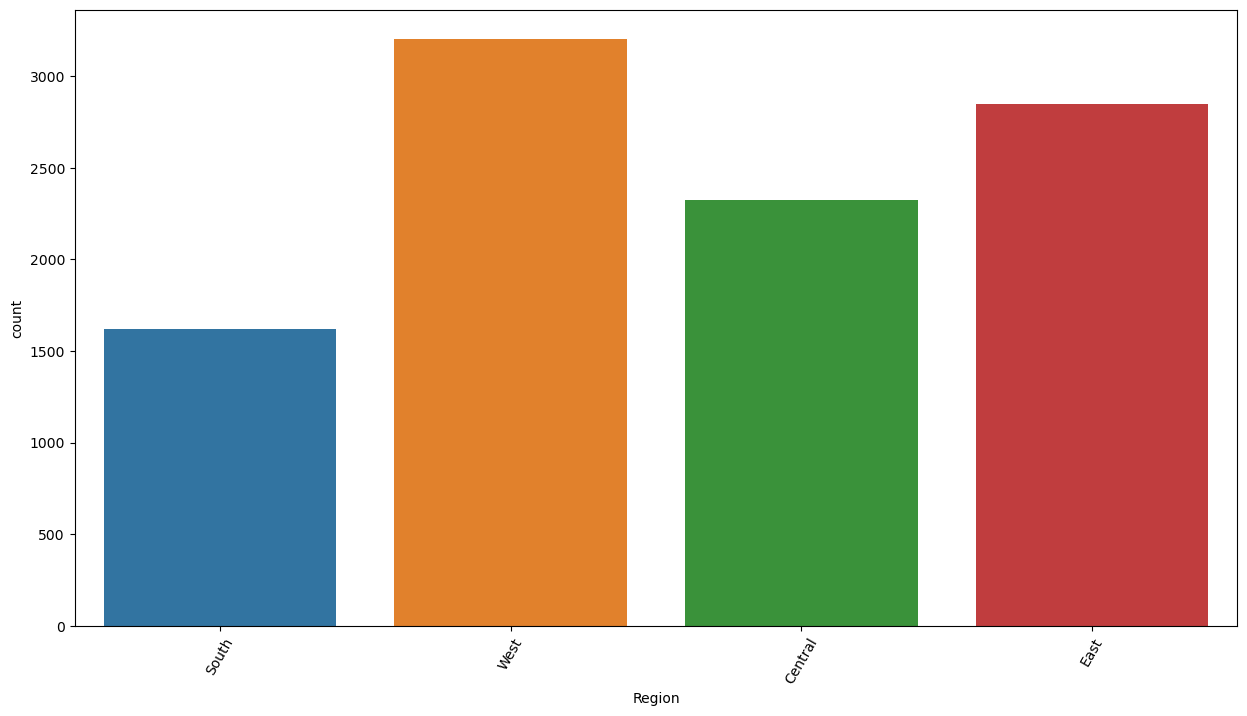

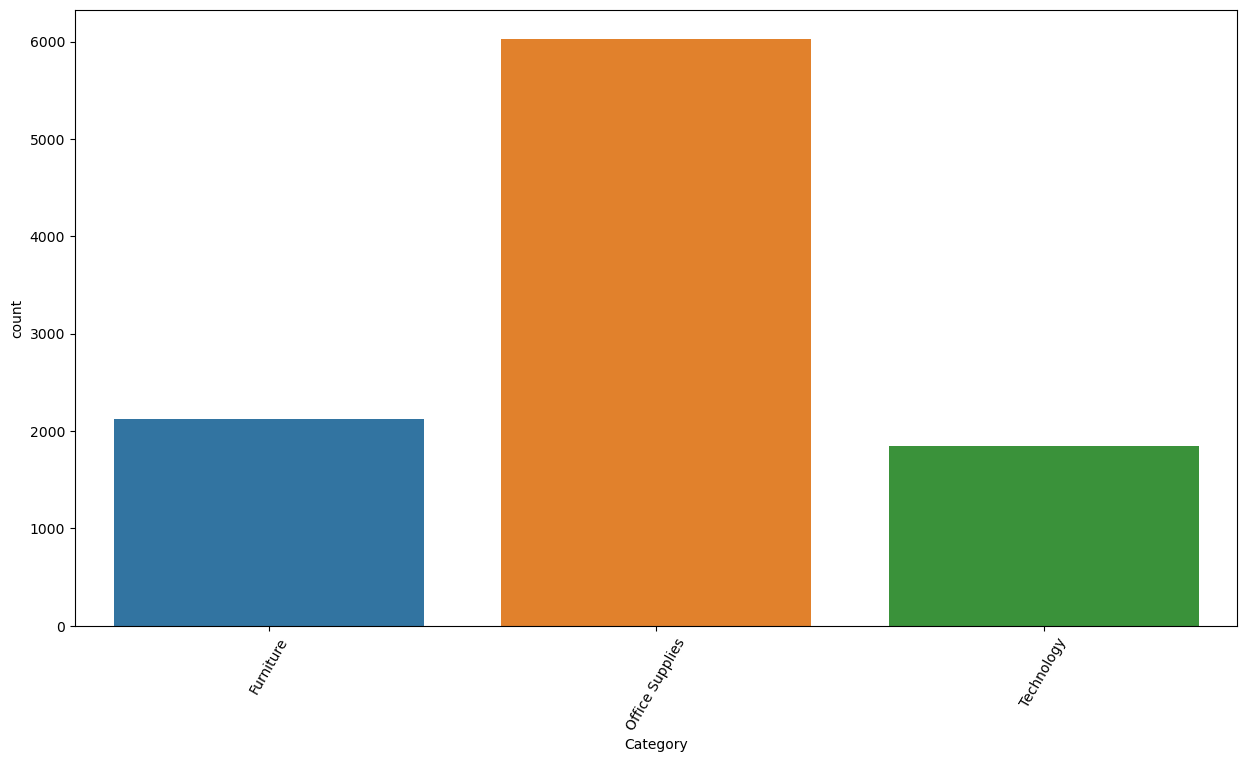

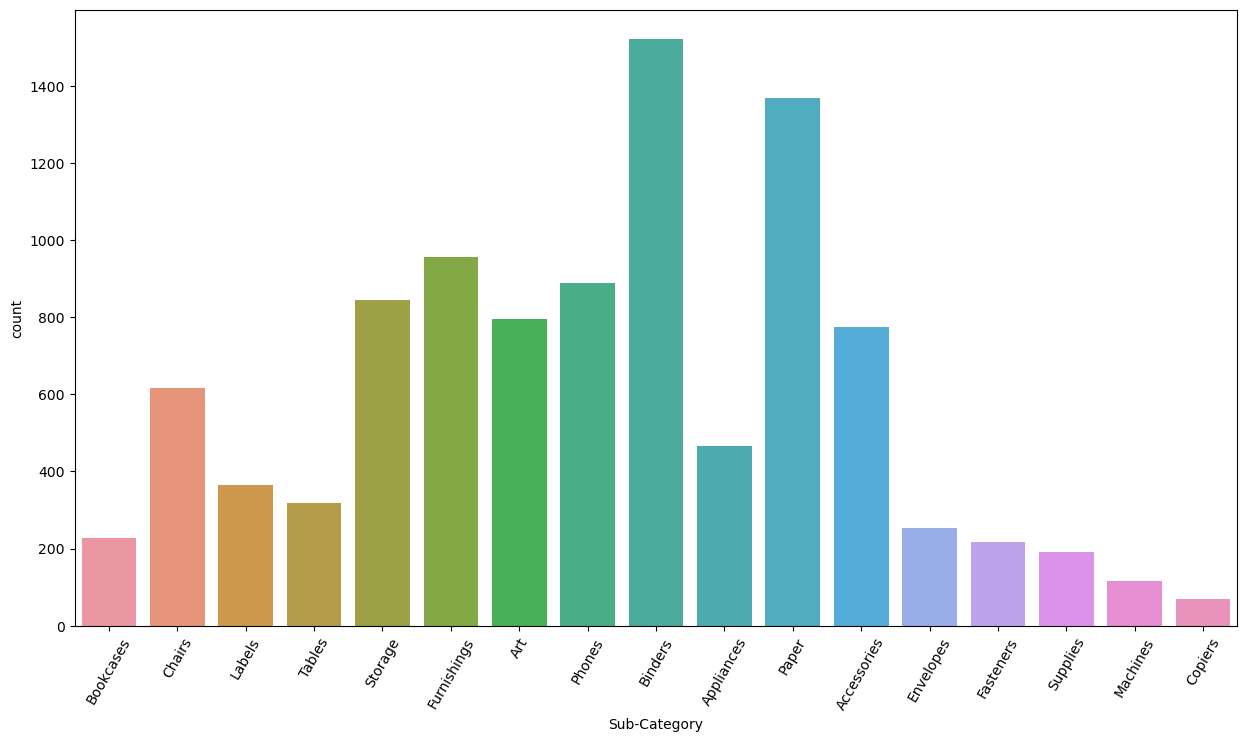

In [66]:
for i in df.select_dtypes(include="O").drop(["City","State"],axis=1).columns:
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[i])
    plt.xticks(rotation=60)
    plt.show()

In [56]:
for i in df.select_dtypes(include="O").columns:
    print(df[i].value_counts().keys()[0],":",df[i].value_counts()[0])

Standard Class : 5968
Consumer : 5191
New York City : 915
California : 2001
West : 3203
Office Supplies : 6026
Binders : 1523


1. Shipping mode mostly used for ordering is **Second Class** with .
2. **Consumer** segment are mostly placing the orders in this data set.
3. Most orders are placed from the **New York City** in this data set.
4. Most orders are placed from the **California** state in this data set.
5. Most of the orders are placed from the **West** region in this data set
6. **Office Supplies** is the category mostly ordered in this data set.
7. **Binders** is the sub-category mostly ordered in this data set.

### Num Vs Num (Heatmap)

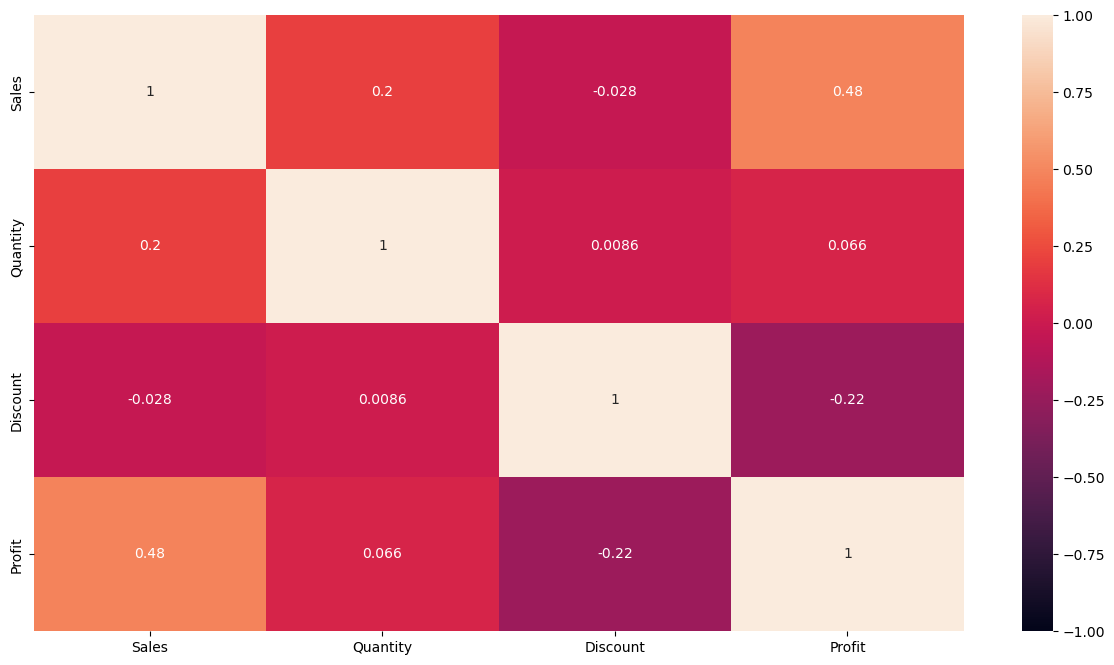

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

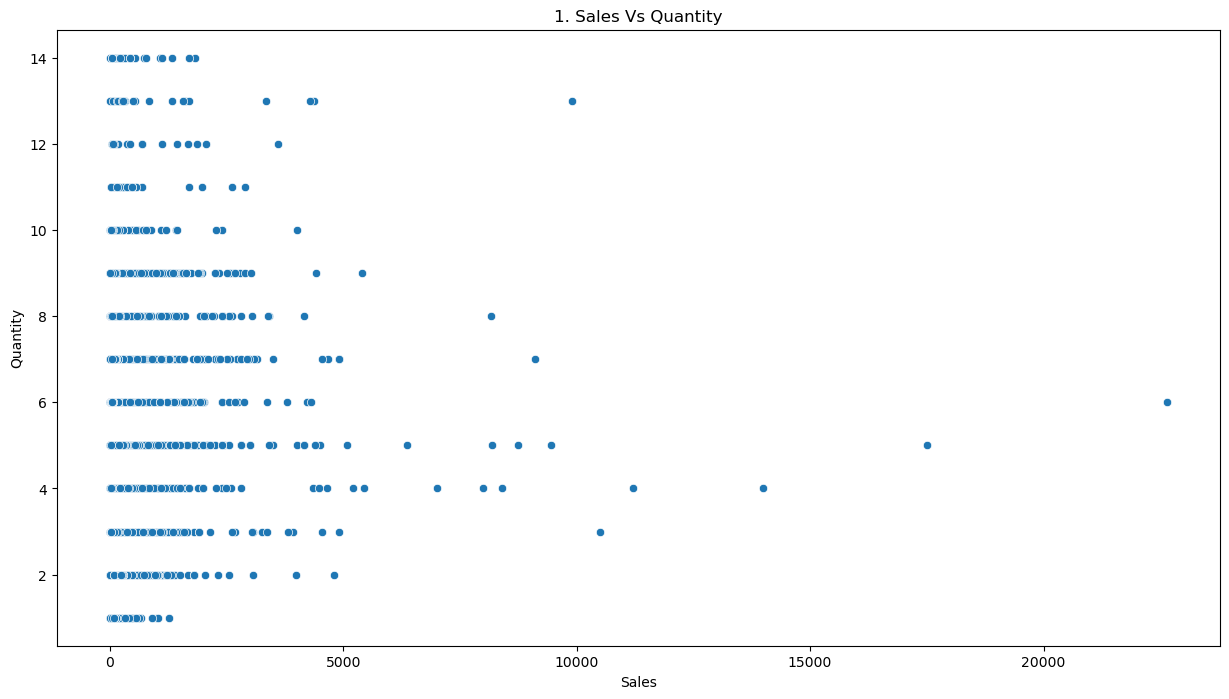

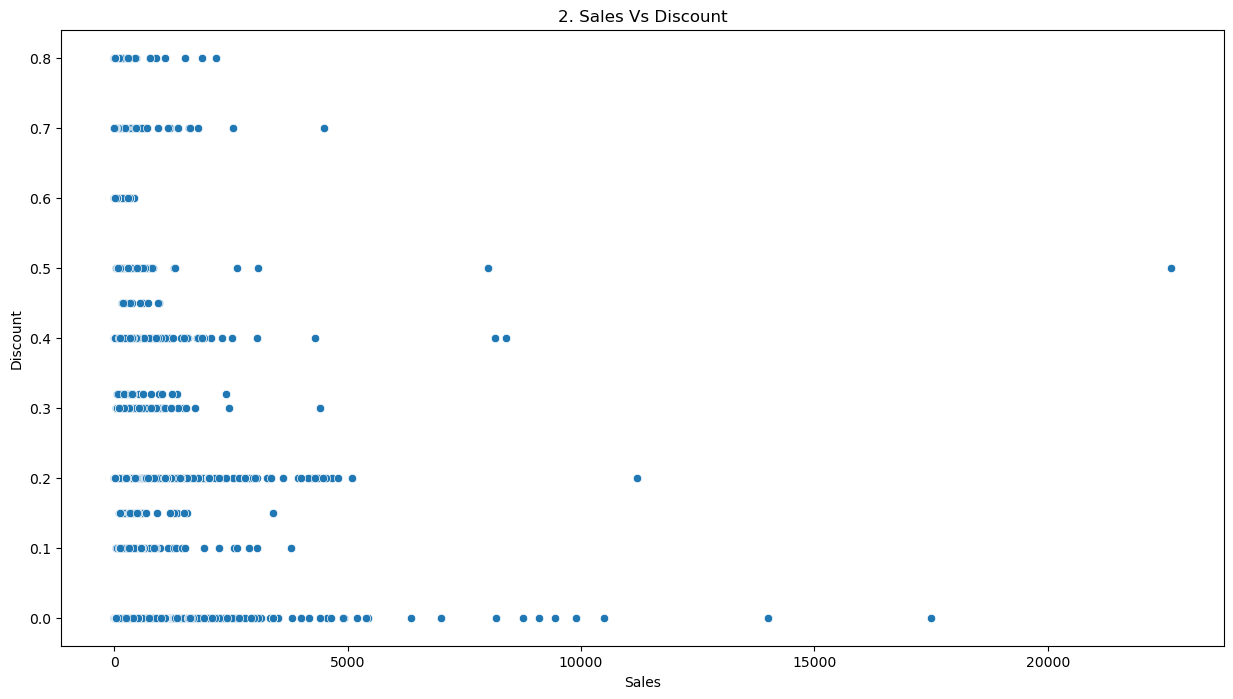

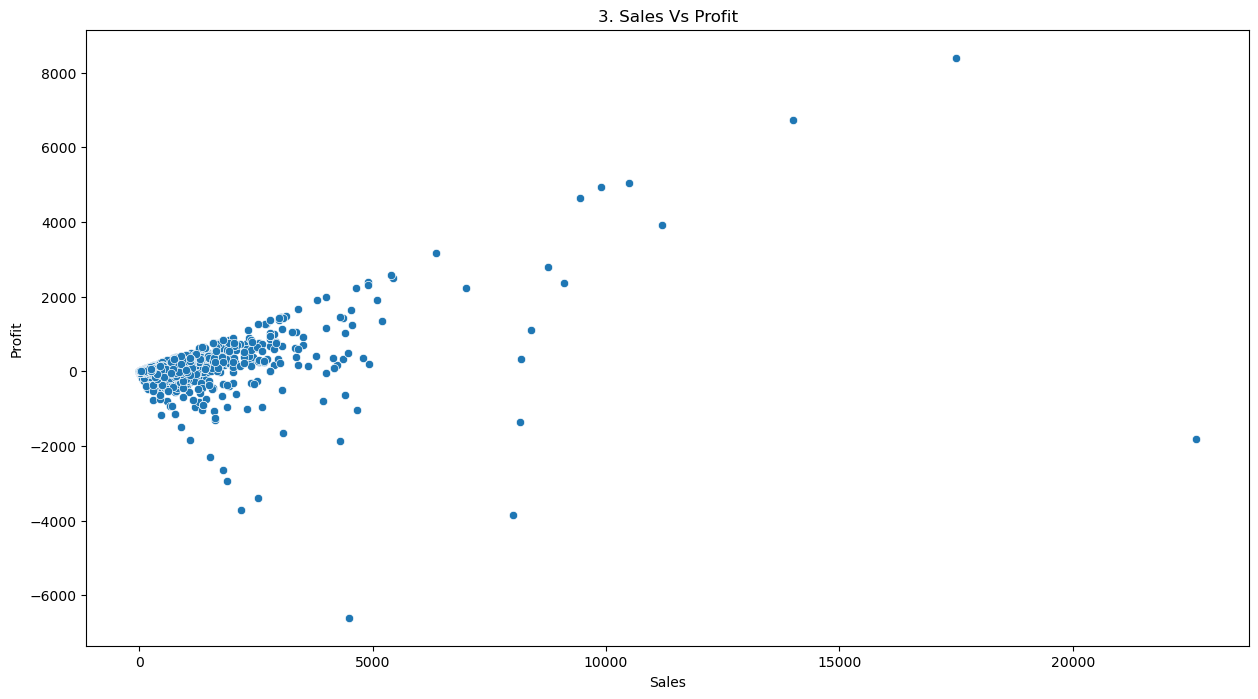

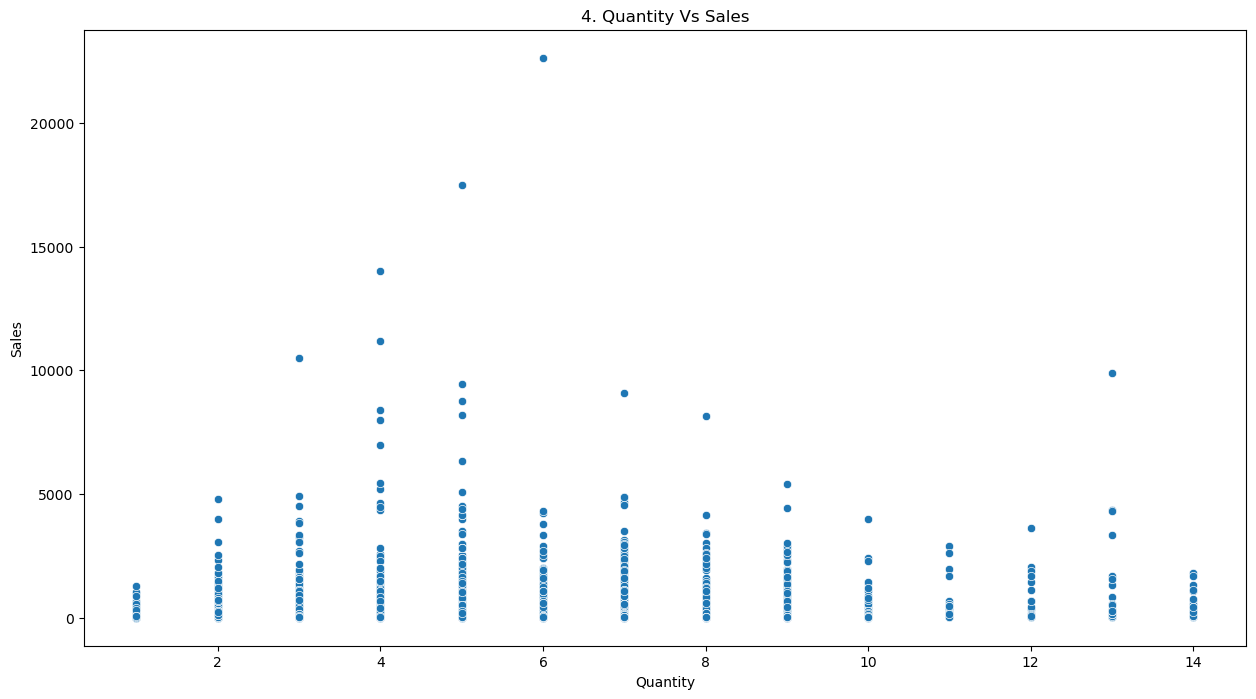

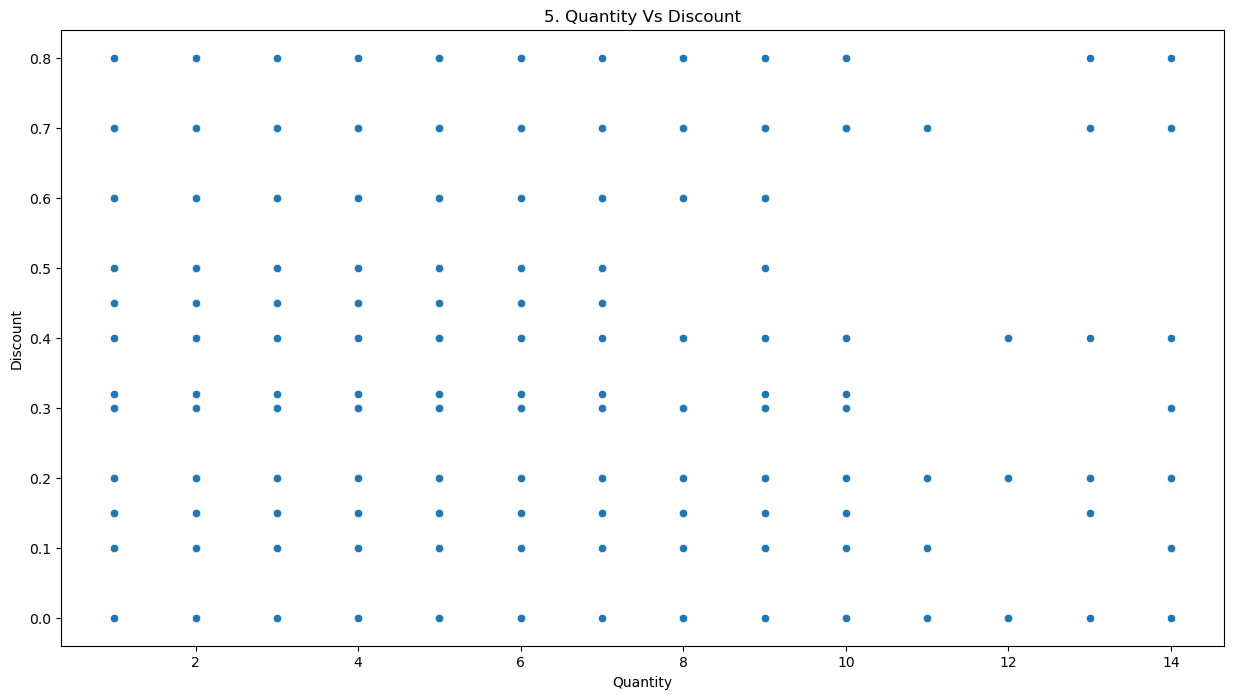

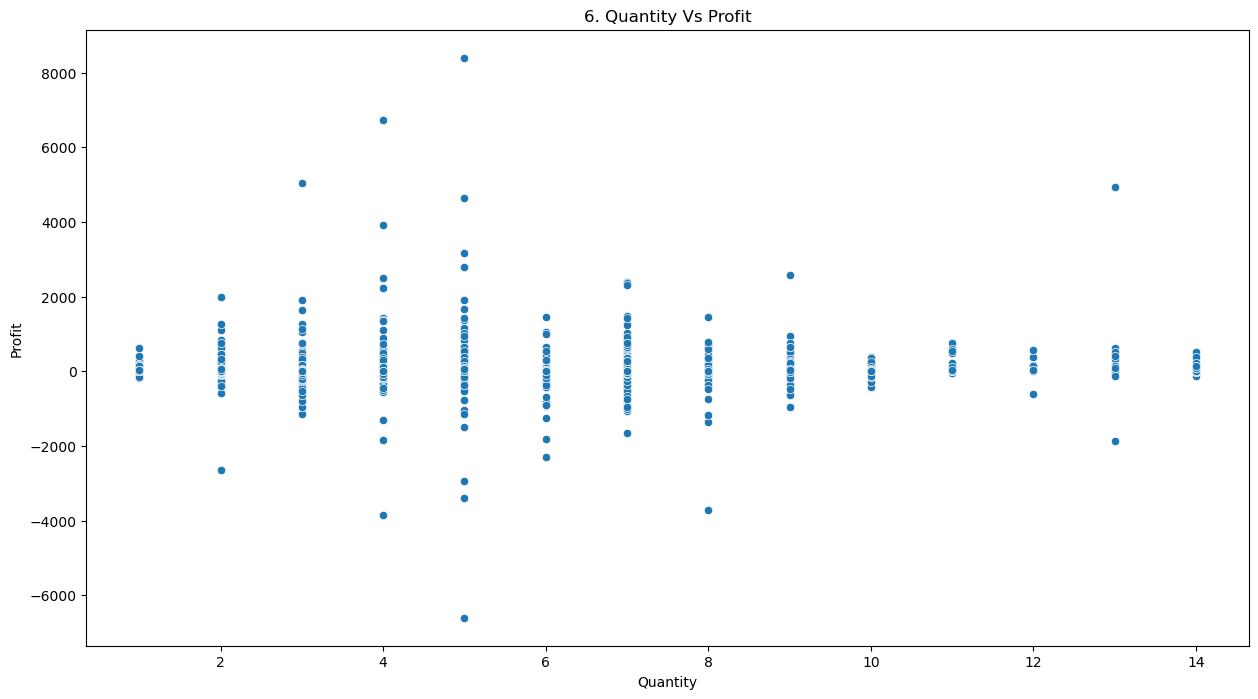

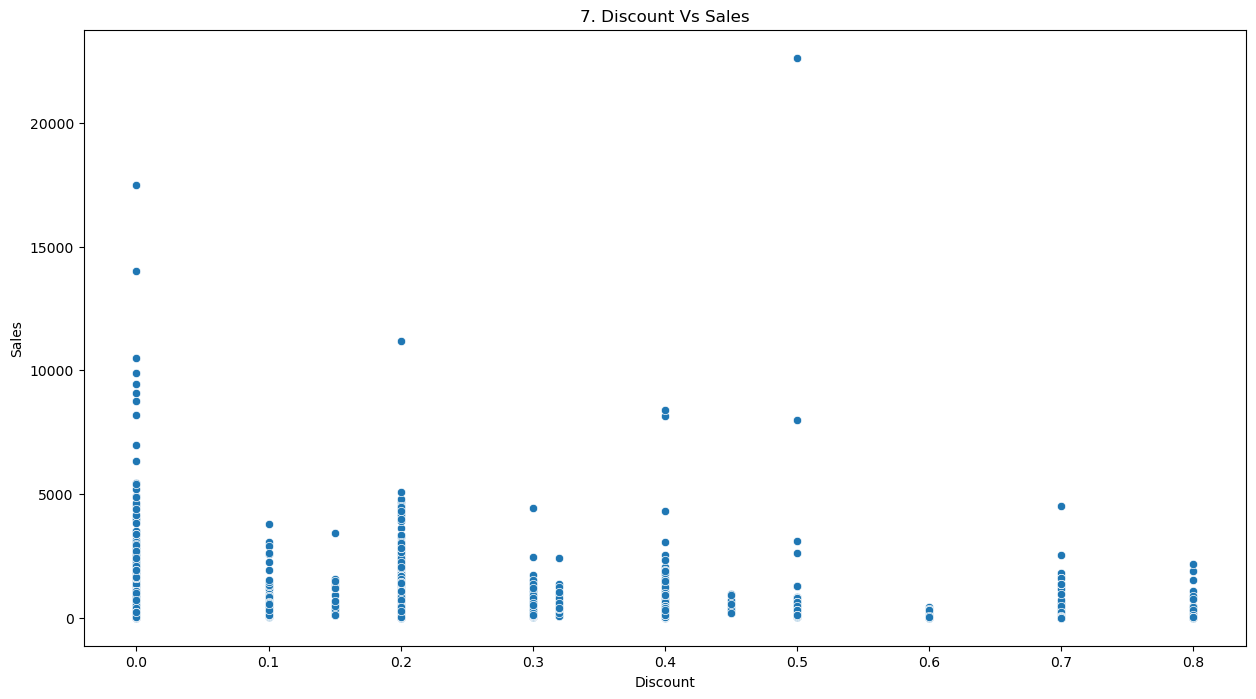

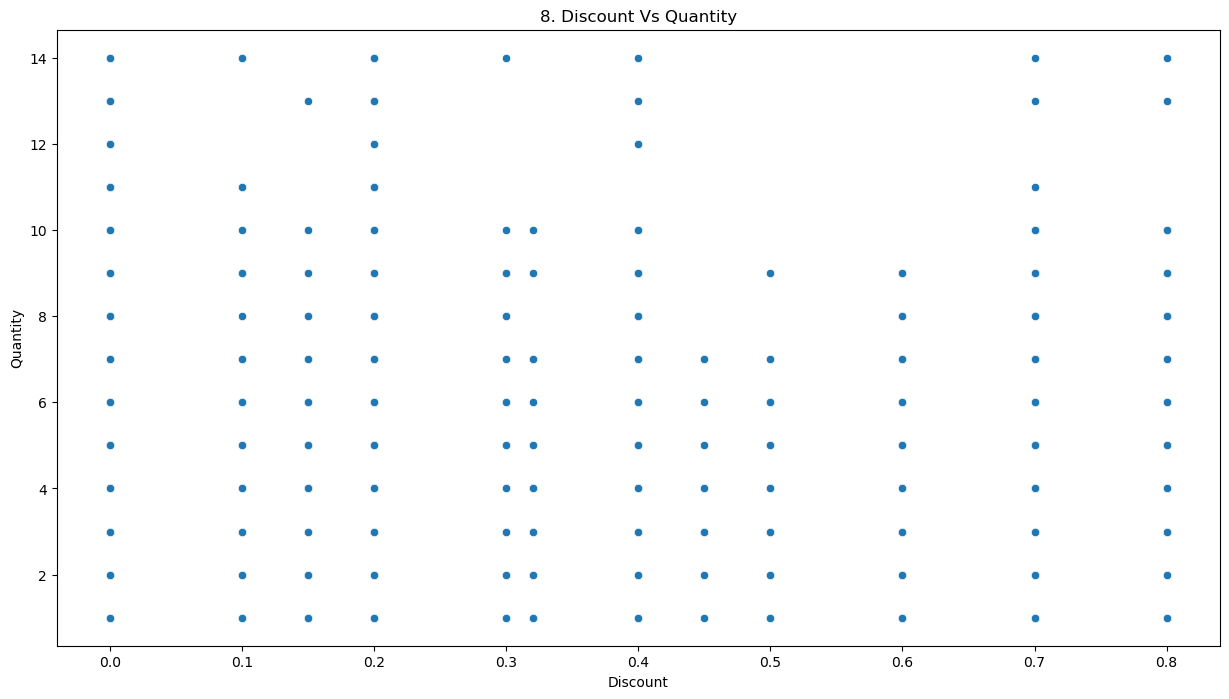

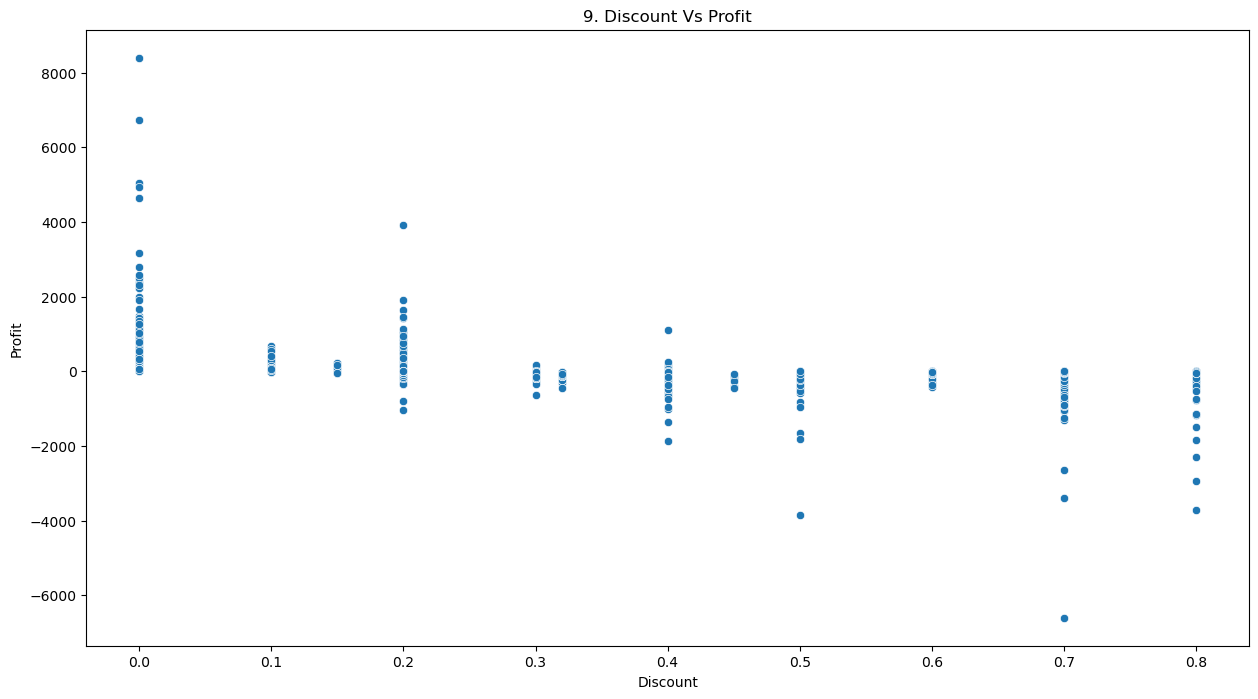

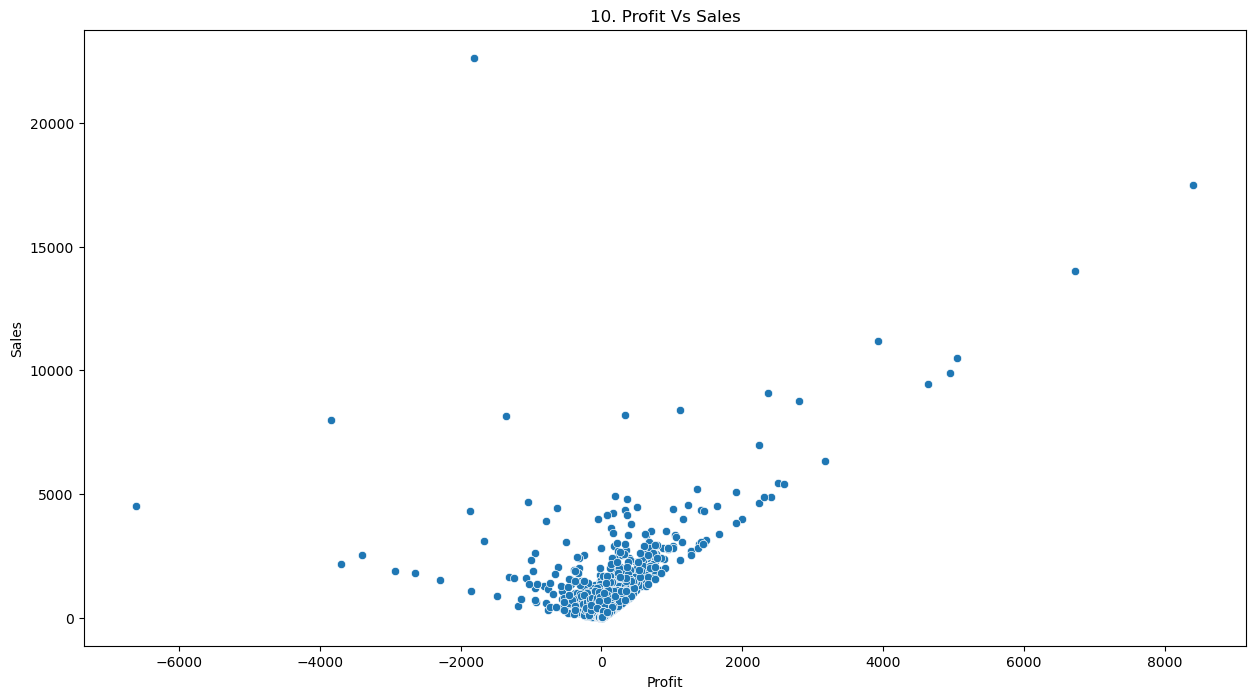

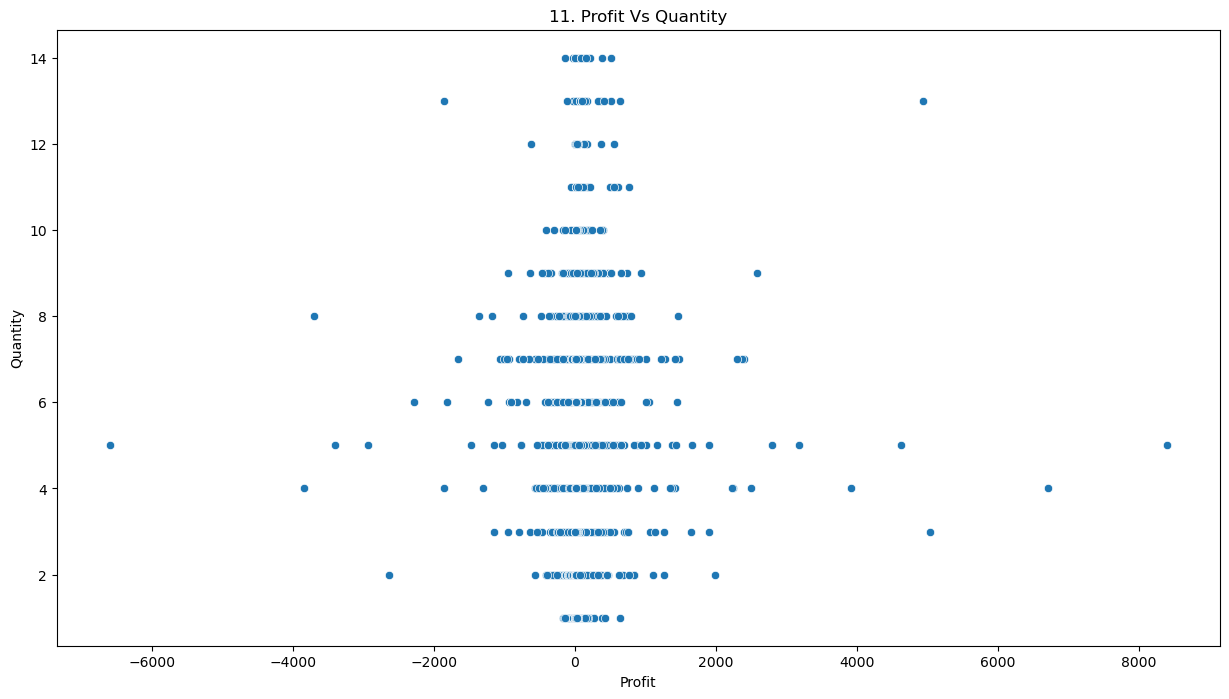

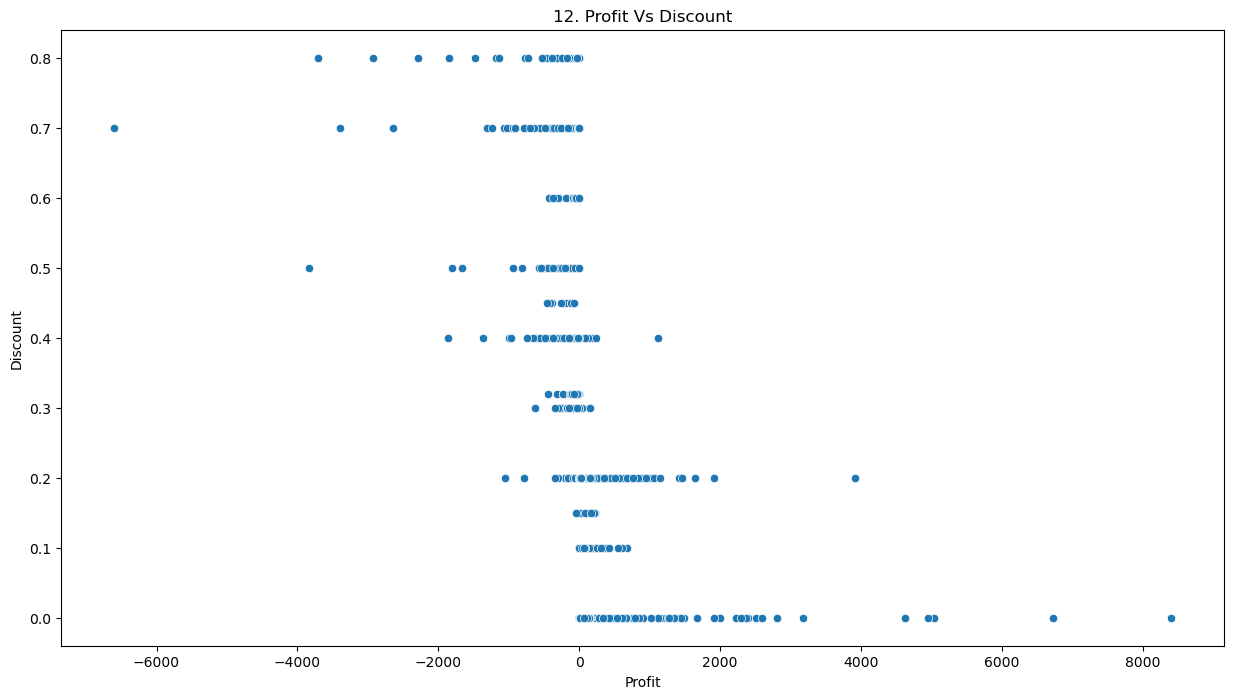

In [75]:
a=0
for i in df.select_dtypes(exclude="O").columns:
    for j in df.select_dtypes(exclude="O").columns:
        if i!=j:
            a+=1
            plt.figure(figsize=(15,8))
            sns.scatterplot(data=df,x=i,y=j)
            plt.title(f"{a}. {i} Vs {j}")
            plt.show()

### Cat Vs Num

#### 1. Cat vs Sales

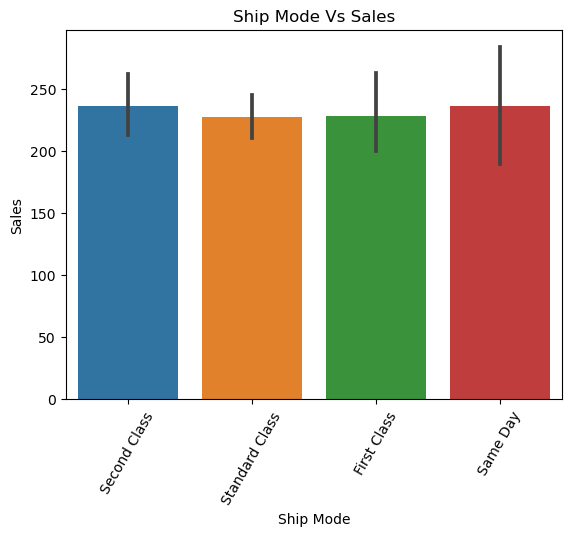

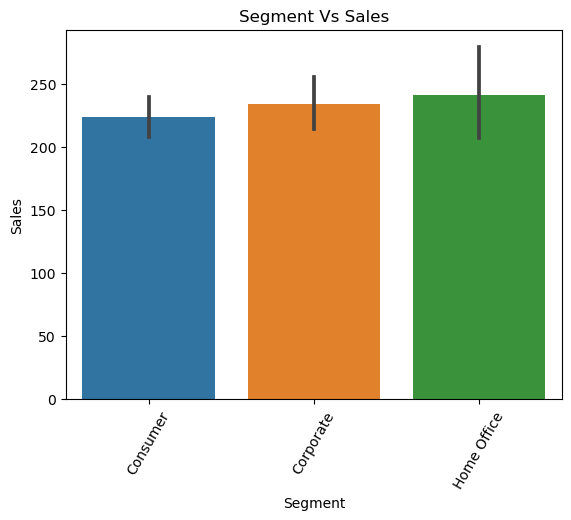

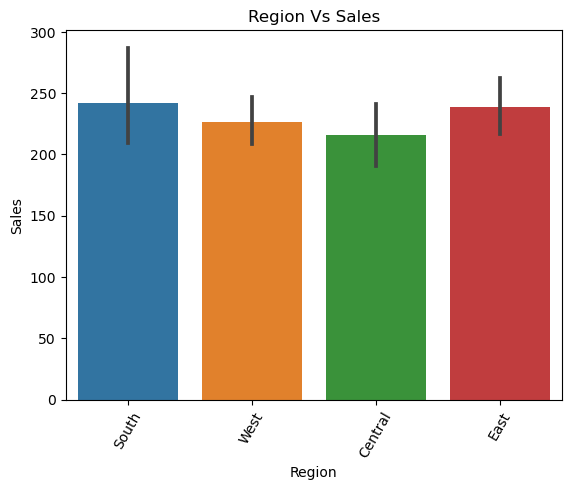

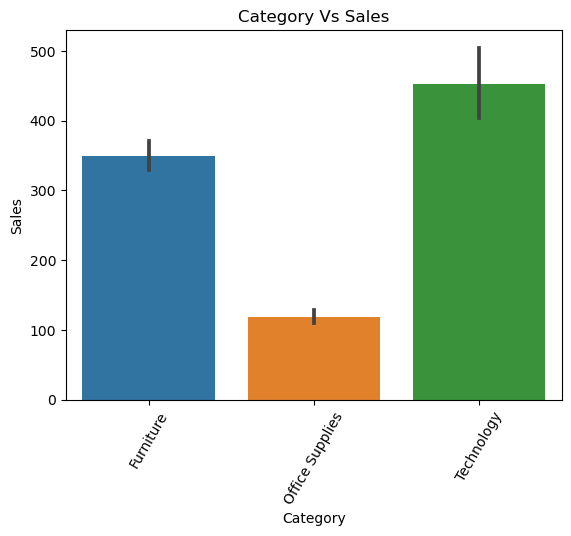

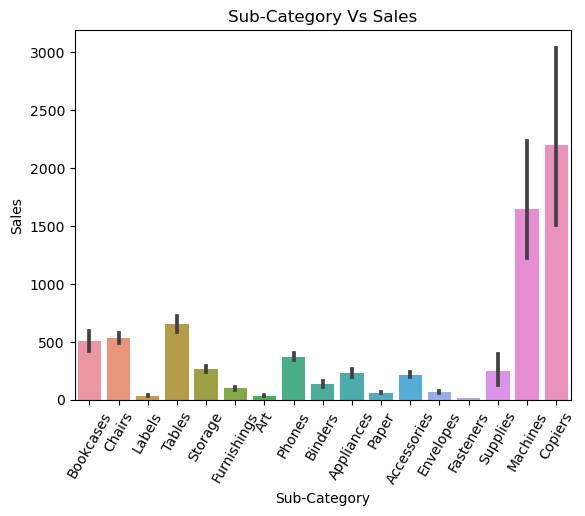

In [79]:
for i in df.select_dtypes(include="O").drop(["City","State"],axis=1).columns:
    sns.barplot(data=df,x=i,y="Sales")
    plt.title(f"{i} Vs Sales")
    plt.xticks(rotation=60)
    plt.show()

#### 2. Cat vs Quantity

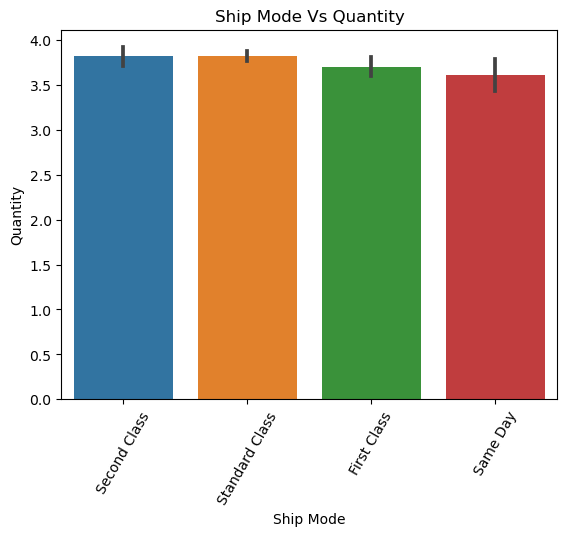

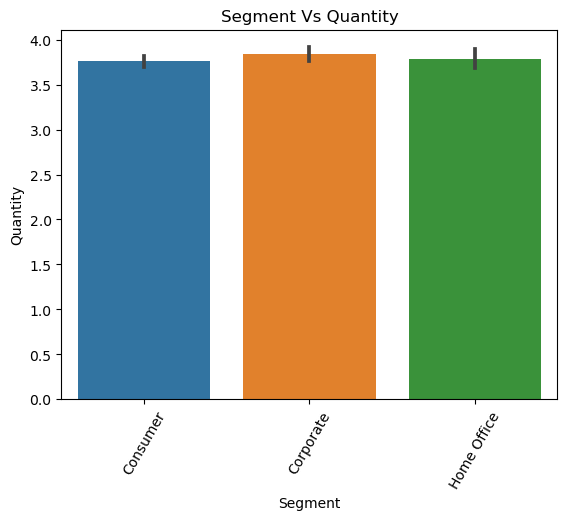

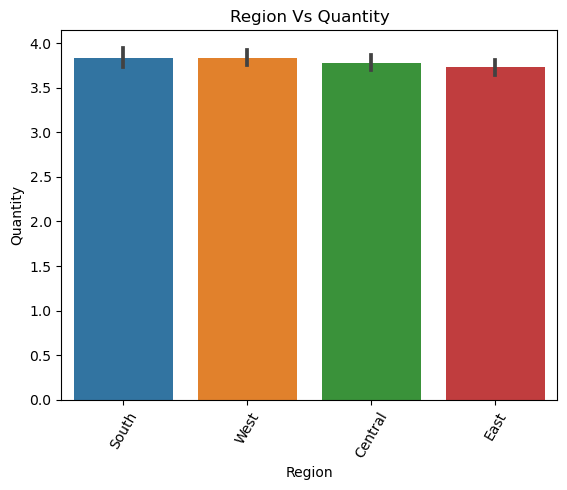

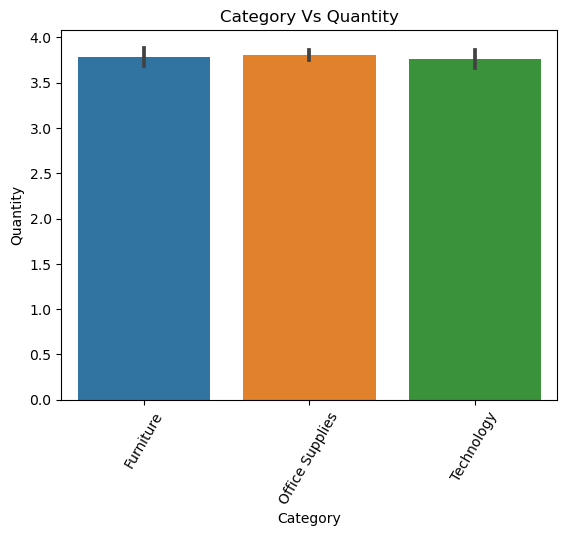

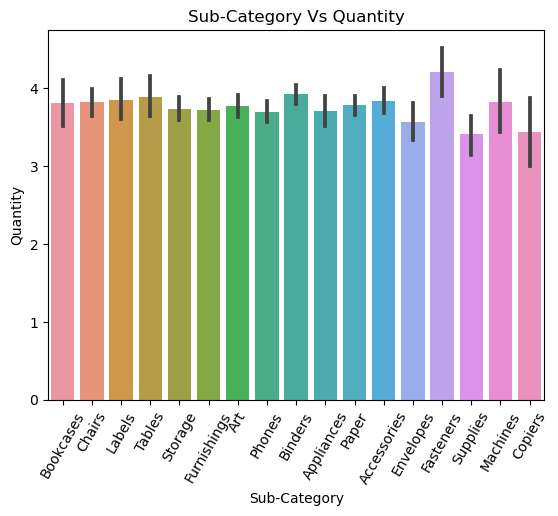

In [81]:
for i in df.select_dtypes(include="O").drop(["City","State"],axis=1).columns:
    sns.barplot(data=df,x=i,y="Quantity")
    plt.title(f"{i} Vs Quantity")
    plt.xticks(rotation=60)
    plt.show()

#### 3. Cat vs Discount

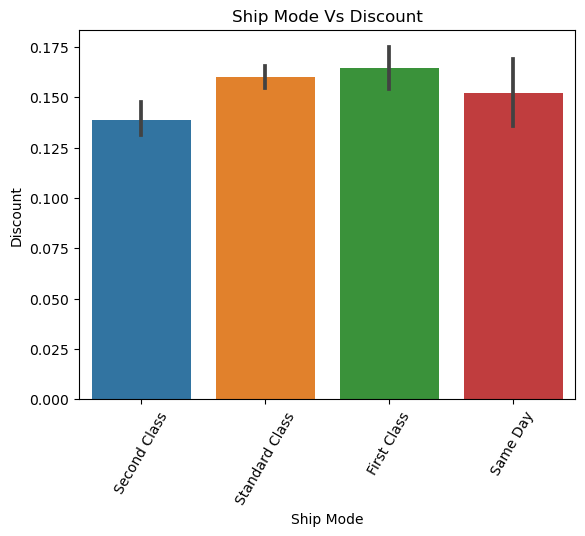

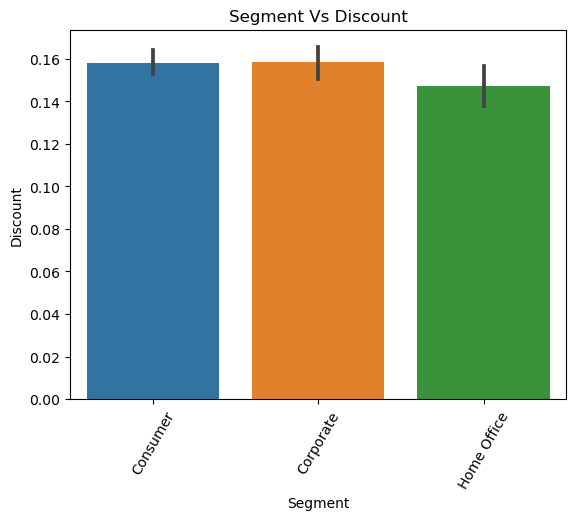

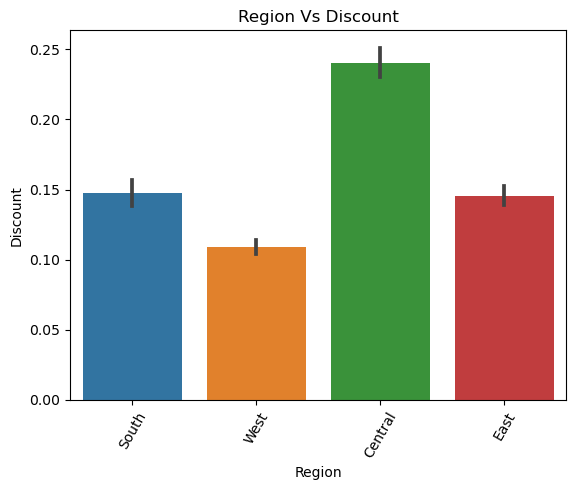

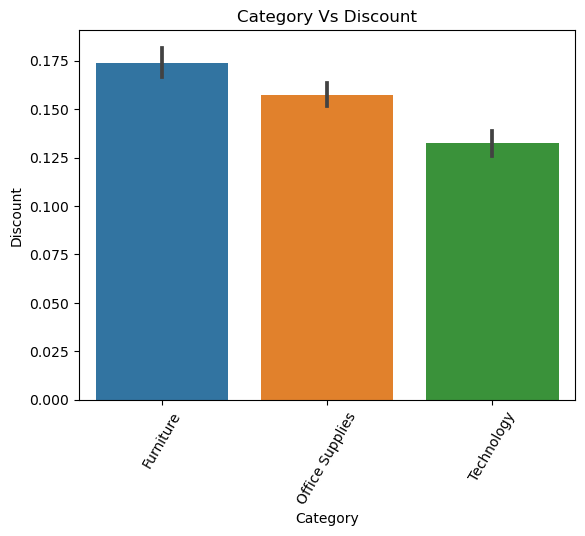

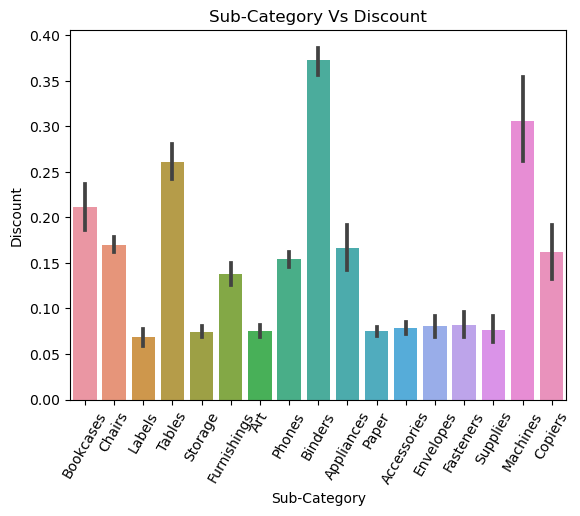

In [83]:
for i in df.select_dtypes(include="O").drop(["City","State"],axis=1).columns:
    sns.barplot(data=df,x=i,y="Discount")
    plt.title(f"{i} Vs Discount")
    plt.xticks(rotation=60)
    plt.show()

#### 4. Cat vs Profit

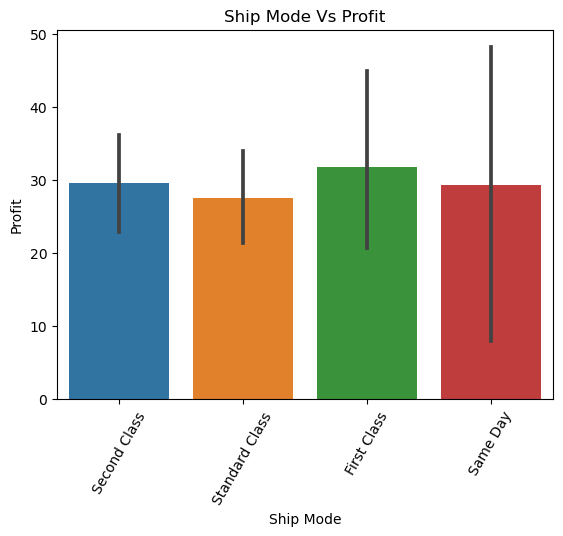

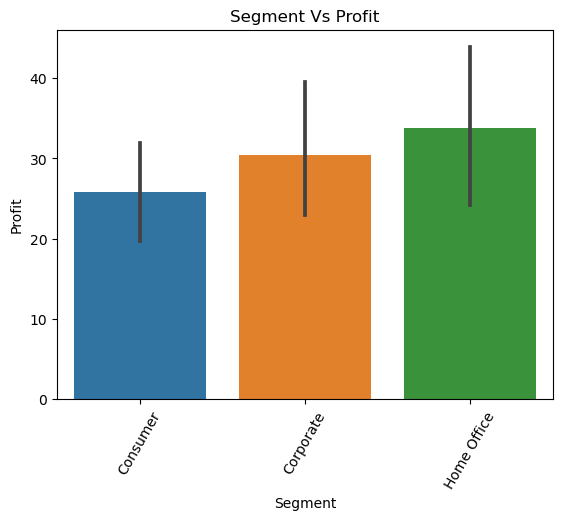

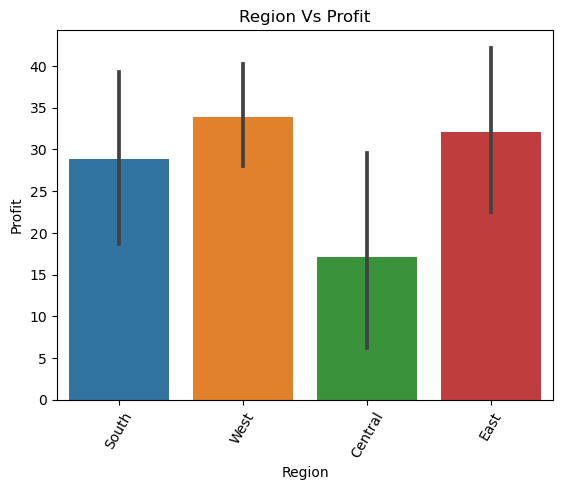

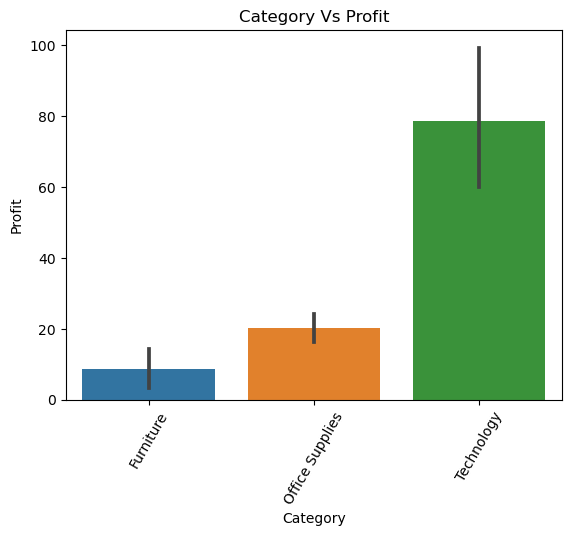

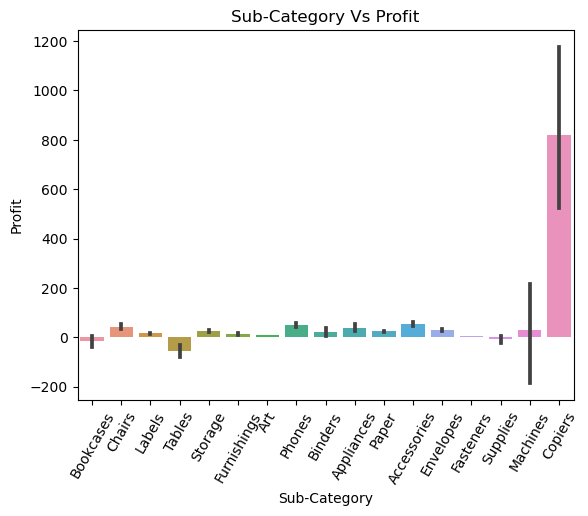

In [84]:
for i in df.select_dtypes(include="O").drop(["City","State"],axis=1).columns:
    sns.barplot(data=df,x=i,y="Profit")
    plt.title(f"{i} Vs Profit")
    plt.xticks(rotation=60)
    plt.show()